   years  sex  mRS score before cerebral hemorrhage  history of hypertension  \
0     43    1                                     0                        0   
1     58    0                                     0                        1   
2     78    0                                     0                        1   
3     70    0                                     2                        1   
4     51    0                                     0                        0   
5     67    0                                     0                        1   
6     58    0                                     0                        1   
7     55    1                                     0                        1   
8     68    1                                     0                        1   
9     74    0                                     0                        1   

   history of stroke  history of diabetes  history of atrial fibrillation  \
0                  0                    0 

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Mean Cross Validation Accuracy: 0.6875
Mean Cross Validation Precision: 0.5839285714285714
Mean Cross Validation Recall: 0.7
Mean Cross Validation F1 Score: 0.6164835164835164


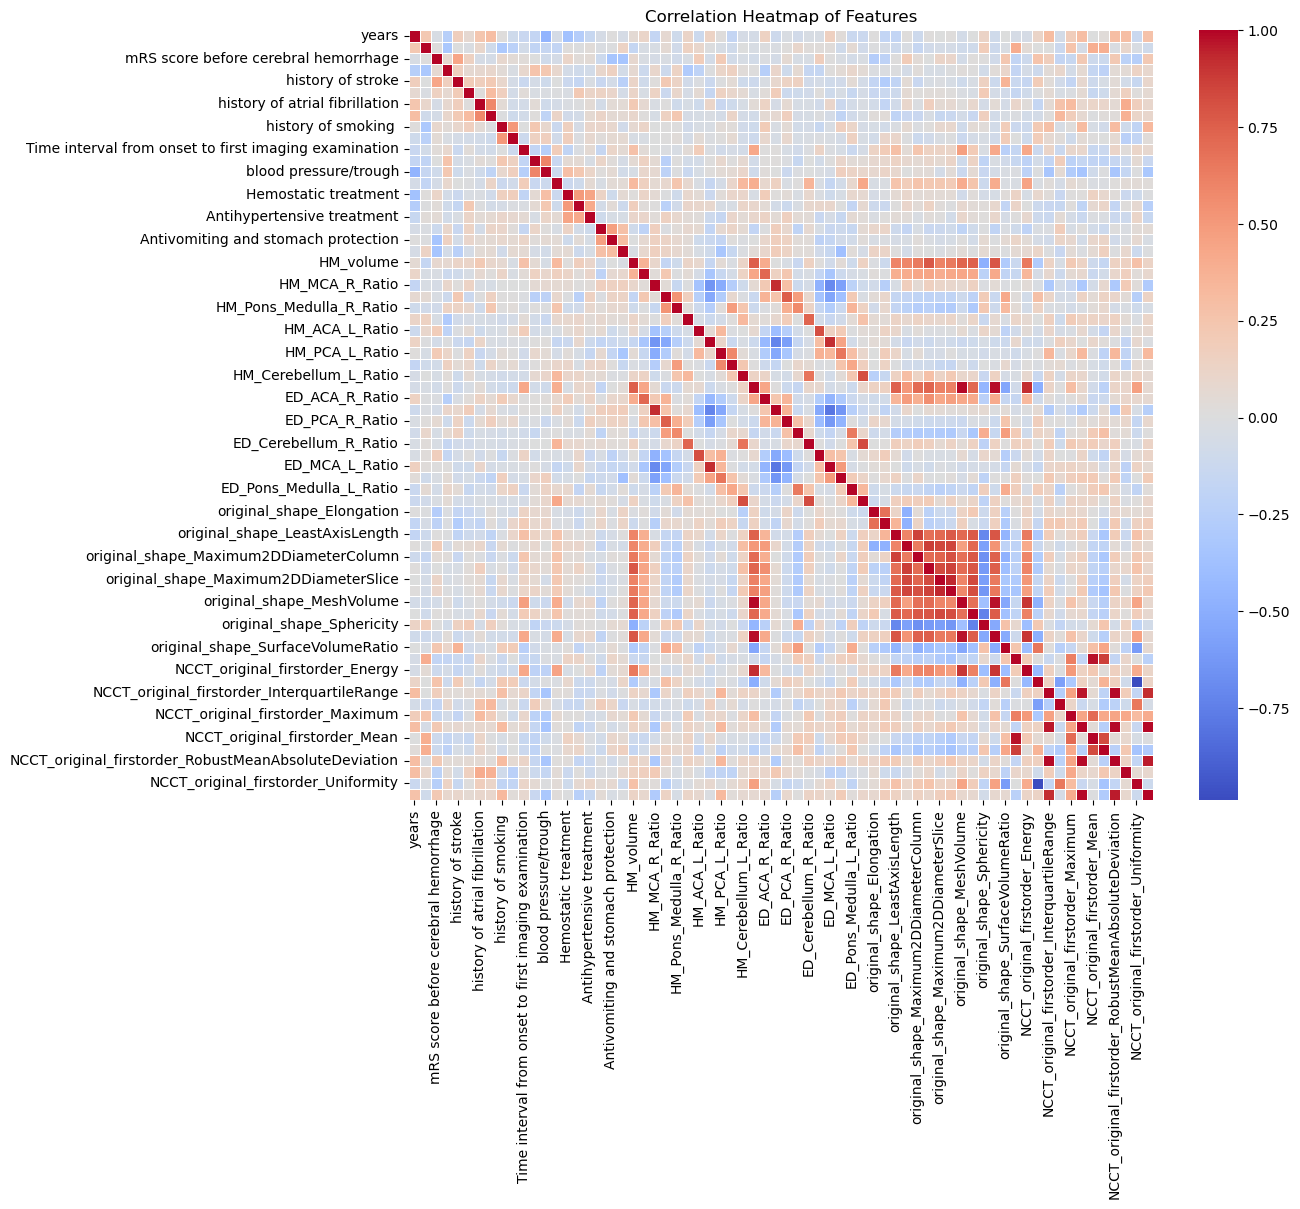

In [5]:
### 1b SHAP分析
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.metrics import roc_curve, auc, accuracy_score  # for model evaluation
from sklearn.model_selection import train_test_split #for data splitting

data = pd.read_excel(r"./data/process/train2.xlsx")
print(data.head(10))

X = data.drop('是否', axis=1)  # 替换 'target_variable' 为实际的目标变量列名
y = data['是否']  # 替换 'target_variable' 为实际的目标变量列名

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

# 使用交叉验证评估模型
scores = cross_val_score(model, X_train, y_train, cv=10)

# 计算交叉验证的平均准确率
mean_accuracy = scores.mean()

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_predict = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

# 打印分类器的性能指标
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# 执行10倍交叉验证并计算平均精确率、召回率和F1得分
cv_precision = cross_val_score(model, X_train, y_train, cv=10, scoring='precision_weighted').mean()
cv_recall = cross_val_score(model, X_train, y_train, cv=10, scoring='recall_weighted').mean()
cv_f1 = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_weighted').mean()

# 打印平均精确率、召回率和F1得分
print("Mean Cross Validation Accuracy:", mean_accuracy)
print("Mean Cross Validation Precision:", cv_precision)
print("Mean Cross Validation Recall:", cv_recall)
print("Mean Cross Validation F1 Score:", cv_f1)

# 计算特征之间的相关系数
correlation_matrix = X_train.corr()

# 绘制共线性热力图
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


In [6]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score  # for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import shap #for SHAP values

# 读取数据
data = pd.read_excel(r"./data/process/train2.xlsx")

# 分离特征和目标变量
X = data.drop('是否', axis=1)
y = data['是否']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 在测试集上进行预测
y_predict = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

# 打印分类器的性能指标
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# 执行10倍交叉验证并计算平均精确率、召回率和F1得分
cv_precision = cross_val_score(model, X_train, y_train, cv=10, scoring='precision_weighted').mean()
cv_recall = cross_val_score(model, X_train, y_train, cv=10, scoring='recall_weighted').mean()
cv_f1 = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_weighted').mean()

# 打印平均精确率、召回率和F1得分
print("Mean Cross Validation Accuracy:", mean_accuracy)
print("Mean Cross Validation Precision:", cv_precision)
print("Mean Cross Validation Recall:", cv_recall)
print("Mean Cross Validation F1 Score:", cv_f1)

# 生成 SHAP 值
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 获取图形对象
fig = plt.gcf()

# 调整图形大小
fig.set_size_inches(10, 8)

# 显示图形
plt.show()

# 绘制力图
shap.initjs()
# 绘制力图
shap.initjs()
shap.plots.force(explainer.expected_value[0],shap_values[0])

Accuracy: 0.7
Precision: 0.6222222222222222
Recall: 0.7
F1 Score: 0.6588235294117647


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Mean Cross Validation Accuracy: 0.6875
Mean Cross Validation Precision: 0.5517857142857142
Mean Cross Validation Recall: 0.6875
Mean Cross Validation F1 Score: 0.6296703296703295


<Figure size 1000x800 with 0 Axes>

Mean Cross Validation Accuracy: 0.6857142857142857
Accuracy: 0.7
Precision: 0.7613636363636364
Recall: 0.7
F1 Score: 0.7250409165302781
Mean Cross Validation Precision: 0.6718027210884354
Mean Cross Validation Recall: 0.6857142857142857
Mean Cross Validation F1 Score: 0.6592496392496392


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


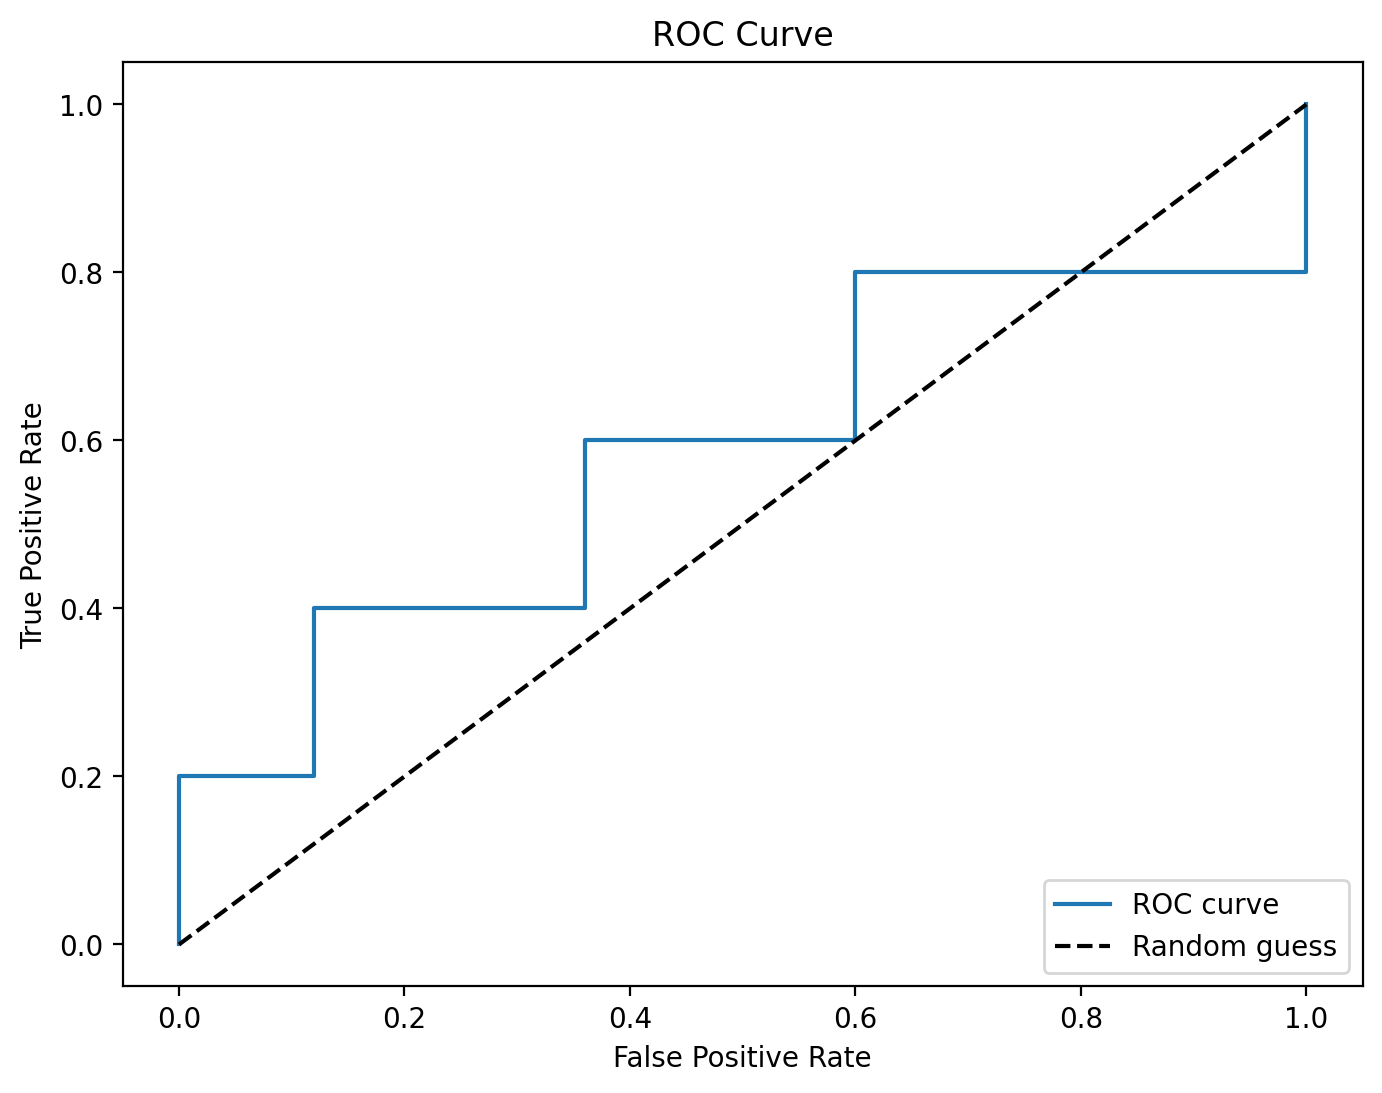

[0.7250409165302781]

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve

B_PCA_Ac = []
B_PCA_Pr = []
B_PCA_Re = []
B_PCA_F1 = []

plt.figure(figsize=(8,6),dpi=200)

# 读取CSV文件
#data = pd.read_csv(r"./data/process/train.csv") #pca前
data = pd.read_csv(r"./data/process/train1.csv") #pca后

# 分割特征和目标变量
X = data.drop('y', axis=1)  # 替换 'target_variable' 为实际的目标变量列名
y = data['y']  # 替换 'target_variable' 为实际的目标变量列名

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建逻辑回归模型
model = LogisticRegression()

# 使用交叉验证评估模型
scores = cross_val_score(model, X_train, y_train, cv=10)

# 计算交叉验证的平均准确率
mean_accuracy = scores.mean()

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_predict = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

B_PCA_Ac.append(accuracy)
B_PCA_Pr.append(precision)
B_PCA_Re.append(recall)
B_PCA_F1.append(f1)

# 打印分类器的性能指标
print("Mean Cross Validation Accuracy:", mean_accuracy)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# 执行10倍交叉验证并计算平均精确率、召回率和F1得分
cv_precision = cross_val_score(model, X_train, y_train, cv=10, scoring='precision_weighted').mean()
cv_recall = cross_val_score(model, X_train, y_train, cv=10, scoring='recall_weighted').mean()
cv_f1 = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_weighted').mean()

# 打印平均精确率、召回率和F1得分
print("Mean Cross Validation Precision:", cv_precision)
print("Mean Cross Validation Recall:", cv_recall)
print("Mean Cross Validation F1 Score:", cv_f1)

import matplotlib.pyplot as plt
# 获取样本属于正类的概率
y_prob = model.predict_proba(X_test)[:, 1]

# 计算TPR和FPR
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 绘制ROC曲线
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

B_PCA_F1

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Mean Cross Validation Accuracy: 0.7
Accuracy: 0.8
Precision: 0.64
Recall: 0.8
F1 Score: 0.711111111111111


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined an

Mean Cross Validation Precision: 0.5571428571428572
Mean Cross Validation Recall: 0.725
Mean Cross Validation F1 Score: 0.6512820512820513


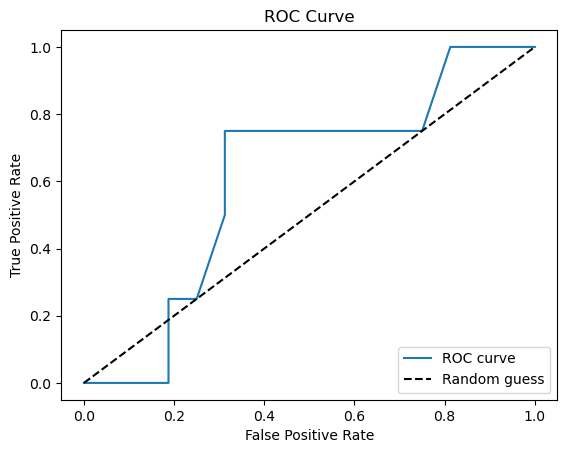

In [15]:
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 读取CSV文件
#data = pd.read_csv(r"./data/process/train.csv") #pca前
data = pd.read_csv(r"./data/process/train1.csv") #pca后

# 分割特征和目标变量
X = data.drop('y', axis=1)  # 替换 'target_variable' 为实际的目标变量列名
y = data['y']  # 替换 'target_variable' 为实际的目标变量列名

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

# 使用交叉验证评估模型
scores = cross_val_score(model, X_train, y_train, cv=10)

# 计算交叉验证的平均准确率
mean_accuracy = scores.mean()

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_predict = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

# 打印分类器的性能指标
print("Mean Cross Validation Accuracy:", mean_accuracy)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

B_PCA_Ac.append(accuracy)
B_PCA_Pr.append(precision)
B_PCA_Re.append(recall)
B_PCA_F1.append(f1)


# 执行10倍交叉验证并计算平均精确率、召回率和F1得分
cv_precision = cross_val_score(model, X_train, y_train, cv=10, scoring='precision_weighted').mean()
cv_recall = cross_val_score(model, X_train, y_train, cv=10, scoring='recall_weighted').mean()
cv_f1 = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_weighted').mean()

# 打印平均精确率、召回率和F1得分
print("Mean Cross Validation Precision:", cv_precision)
print("Mean Cross Validation Recall:", cv_recall)
print("Mean Cross Validation F1 Score:", cv_f1)

import matplotlib.pyplot as plt
# 获取样本属于正类的概率
y_prob = model.predict_proba(X_test)[:, 1]

# 计算TPR和FPR
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 绘制ROC曲线
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Mean Cross Validation Accuracy: 0.6625
Accuracy: 0.7
Precision: 0.6222222222222222
Recall: 0.7
F1 Score: 0.6588235294117647


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Mean Cross Validation Precision: 0.5994642857142857
Mean Cross Validation Recall: 0.6625
Mean Cross Validation F1 Score: 0.6209457209457209


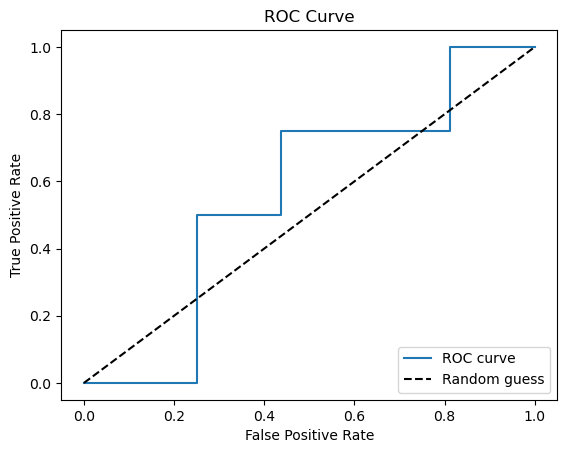

In [17]:
import xgboost as xgb

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 读取CSV文件
#data = pd.read_csv(r"./data/process/train.csv") #pca前
data = pd.read_csv(r"./data/process/train1.csv") #pca后

# 分割特征和目标变量
X = data.drop('y', axis=1)  # 替换 'target_variable' 为实际的目标变量列名
y = data['y']  # 替换 'target_variable' 为实际的目标变量列名

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier()

# 使用交叉验证评估模型
scores = cross_val_score(model, X_train, y_train, cv=10)

# 计算交叉验证的平均准确率
mean_accuracy = scores.mean()

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_predict = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

# 打印分类器的性能指标
print("Mean Cross Validation Accuracy:", mean_accuracy)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

B_PCA_Ac.append(accuracy)
B_PCA_Pr.append(precision)
B_PCA_Re.append(recall)
B_PCA_F1.append(f1)


# 执行10倍交叉验证并计算平均精确率、召回率和F1得分
cv_precision = cross_val_score(model, X_train, y_train, cv=10, scoring='precision_weighted').mean()
cv_recall = cross_val_score(model, X_train, y_train, cv=10, scoring='recall_weighted').mean()
cv_f1 = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_weighted').mean()

# 打印平均精确率、召回率和F1得分
print("Mean Cross Validation Precision:", cv_precision)
print("Mean Cross Validation Recall:", cv_recall)
print("Mean Cross Validation F1 Score:", cv_f1)

import matplotlib.pyplot as plt
# 获取样本属于正类的概率
y_prob = model.predict_proba(X_test)[:, 1]

# 计算TPR和FPR
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 绘制ROC曲线
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

B_PCA_Ac

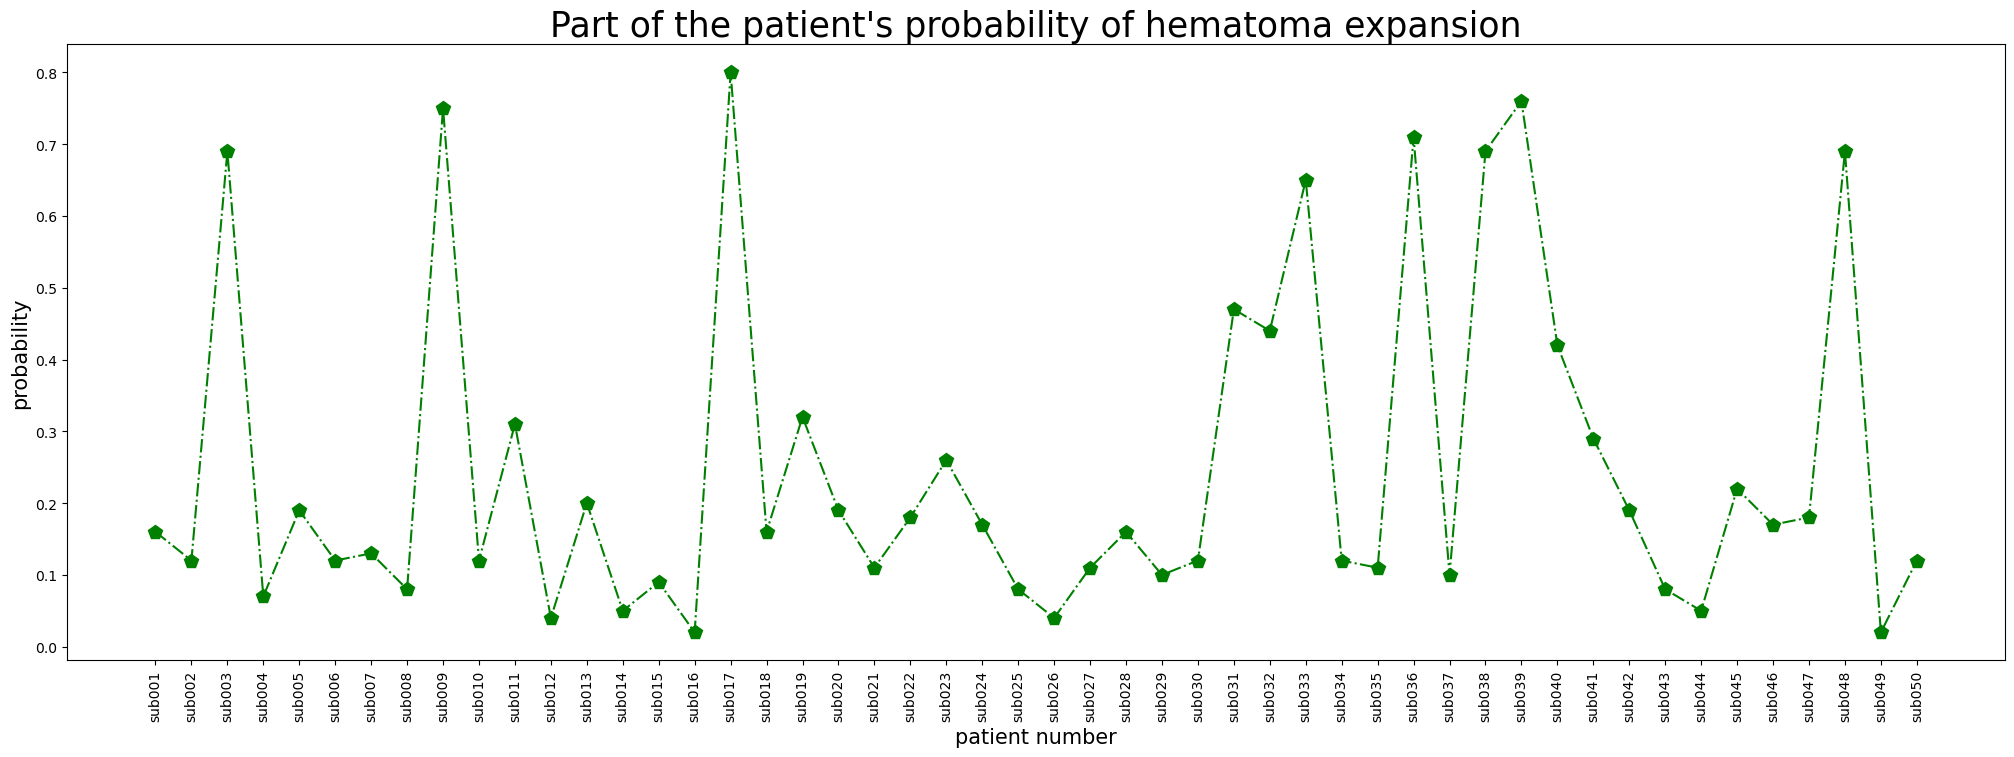

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel(r"./data/process/probability.xlsx")

x = data["ID"]
y = data.drop("ID",axis=1)

part_x = x.iloc[:50]
part_y = y.iloc[:50]

plt.figure(figsize=(25,8),dpi=100)
plt.plot(part_x,part_y,linestyle="-.",color="g",marker="p",markersize=10)
plt.xticks(rotation = 90)

plt.xlabel("patient number",fontsize=15)
plt.ylabel("probability",fontsize=15)
plt.title("Part of the patient's probability of hematoma expansion",fontsize = 25)
 

plt.show()

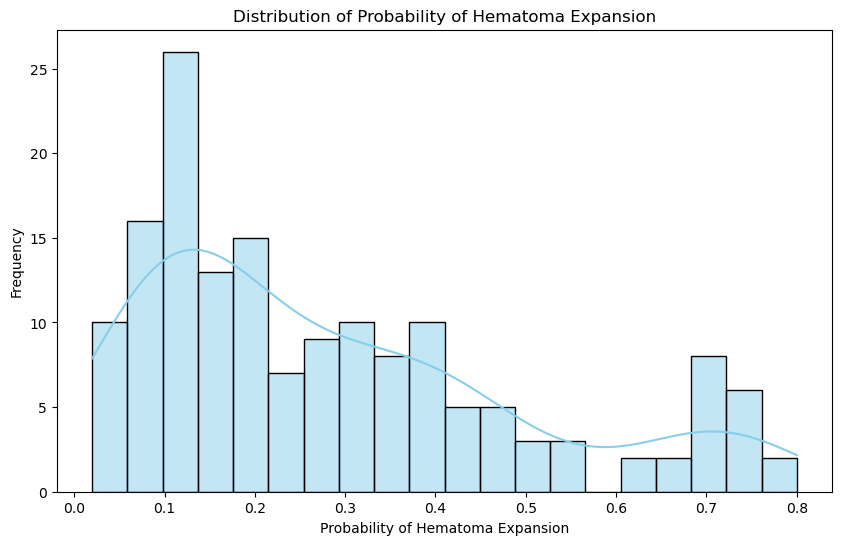

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel(r"./data/process/probability.xlsx")

# 创建直方图和核密度估计图
plt.figure(figsize=(10, 6))
sns.histplot(data["prob_pred"], bins=20, kde=True, color='skyblue', edgecolor='black')

# 设置标题和标签
plt.title('Distribution of Probability of Hematoma Expansion')
plt.xlabel('Probability of Hematoma Expansion')
plt.ylabel('Frequency')

# 显示图表
plt.show()